In [12]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from geopy.geocoders import Nominatim
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
%matplotlib inline

In [13]:
states = gpd.read_file('data/gz_2010_us_040_00_20m.json')
states.head(1)

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.53859 37.00067, -112.53454 37.0..."


In [14]:
states.tail(1)

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
51,0400000US48,48,Texas,,261231.711,"MULTIPOLYGON (((-96.83003 28.11184, -96.82705 ..."


<AxesSubplot:>

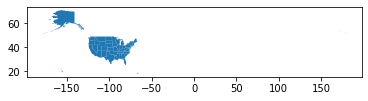

In [15]:
states.plot()

In [21]:
miles = pd.read_csv('data/transportation/traffic/states_miles_perc_change.csv')
miles.head(55)

,state,region,total_2020,total_2019,pct_change
0,Connecticut,northeast,18898,23467,-0.19
1,Maine,northeast,9363,11178,-0.16
2,Massachusetts,northeast,40099,50055,-0.20
3,New Hampshire,northeast,8793,10482,-0.16
4,New Jersey,northeast,46956,58594,-0.20
5,New York,northeast,78664,95576,-0.18
6,Pennsylvania,northeast,64750,77721,-0.17
7,Rhode Island,northeast,5039,6025,-0.16
8,Vermont,northeast,4441,5577,-0.20
9,Delaware,south atlantic,6588,7862,-0.16


In [22]:
states_miles = pd.merge(left = states, right = miles, 
                    left_on = 'NAME', right_on = 'state')
states_miles.head(55)

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry,state,region,total_2020,total_2019,pct_change
0,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.53859 37.00067, -112.53454 37.0...",Arizona,west,45846,50609,-0.09
1,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.04296 33.01922, -94.04304 33.079...",Arkansas,south gulf,25628,27996,-0.08
2,0400000US06,06,California,,155779.220,"MULTIPOLYGON (((-120.24848 33.99933, -120.2473...",California,west,214259,255527,-0.16
3,0400000US08,08,Colorado,,103641.888,"POLYGON ((-107.31779 41.00296, -107.00061 41.0...",Colorado,west,35184,41011,-0.14
4,0400000US09,09,Connecticut,,4842.355,"POLYGON ((-72.39743 42.03330, -72.19883 42.030...",Connecticut,northeast,18898,23467,-0.19
5,0400000US11,11,District of Columbia,,61.048,"POLYGON ((-77.03299 38.83950, -77.03170 38.850...",District of Columbia,south atlantic,2450,2825,-0.13
6,0400000US13,13,Georgia,,57513.485,"POLYGON ((-84.81048 34.98761, -84.80918 34.987...",Georgia,south atlantic,85998,100495,-0.14
7,0400000US15,15,Hawaii,,6422.628,"MULTIPOLYGON (((-155.77823 20.24574, -155.7727...",Hawaii,west,6066,8247,-0.26
8,0400000US17,17,Illinois,,55518.930,"POLYGON ((-89.36603 42.50027, -89.36156 42.500...",Illinois,north central,68662,81934,-0.16
9,0400000US18,18,Indiana,,35826.109,"POLYGON ((-84.80412 40.35276, -84.80392 40.310...",Indiana,north central,53088,60668,-0.12


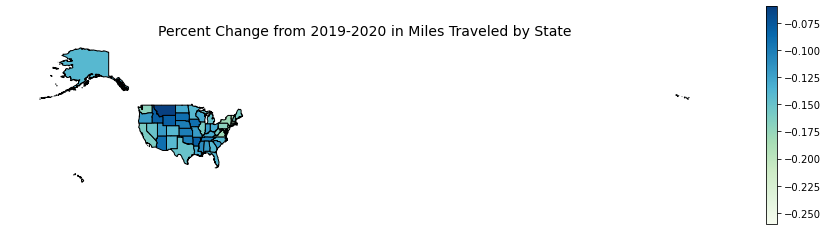

In [20]:
fig, ax = plt.subplots(figsize=(16,4))
states_miles.plot(column = 'pct_change', 
              cmap = 'GnBu', 
              edgecolor = 'black', 
              legend = True,
              ax = ax)
plt.title('Percent Change from 2019-2020 in Miles Traveled by State', fontsize = 14)
ax.axis('off');